In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cPickle as pickle

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable as V

In [4]:
import numpy as np

In [5]:
from model import dlv3plus as net

In [6]:
t1 = net(8, 21).eval().cuda()

In [7]:
cmap = np.load('../demos/src/cmap.npy')

In [8]:
n_params = 0
for p in t1.parameters():
    n_params += p.numel()
print("#PARAMETERS = {}".format(n_params))

#PARAMETERS = 41055413


In [9]:
new_state_dict = torch.load('pt.ckpt')['state_dict']
t1.load_state_dict(new_state_dict)

## Forward Pass

In [10]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
import cv2

/home/vladimir/Documents/venvs/py27/lib/python2.7/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


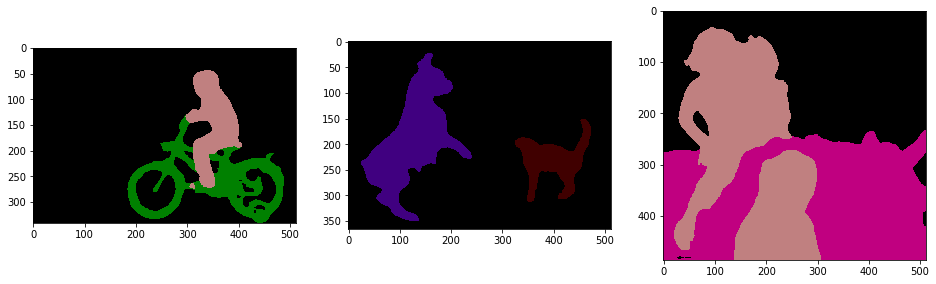

In [12]:
plt.figure(figsize=(16, 12))
for i in range(3):
    img = plt.imread("/home/vladimir/Pictures/image{}.jpg".format(i + 1))
    w, h, _ = img.shape
    ratio = 512. / np.max([w,h])
    resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
    resized = resized / 127.5 - 1.
    pad_x = int(512 - resized.shape[0])
    resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')
    with torch.no_grad():
        inp_var = V(torch.from_numpy(resized2.transpose(2, 0, 1))[None]).float().cuda()
        out = nn.Upsample(mode='bilinear', size=inp_var.size()[2:], align_corners=False)(t1(inp_var))
    labels = np.argmax(out.data.cpu().numpy().squeeze(), axis=0)[:-pad_x]
    plt.subplot(1,3,i+1)
    plt.imshow(cmap[labels])